In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

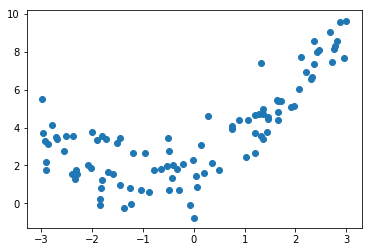

In [3]:
plt.scatter(x, y)
plt.show()

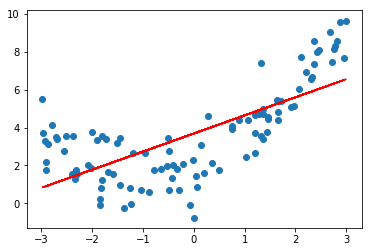

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x, y_predict, color='r')
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 1. 使用多项式回归

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def polynomialRegression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [17]:
poly2_reg = polynomialRegression(degree=2)
poly2_reg.fit(X,y)

y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

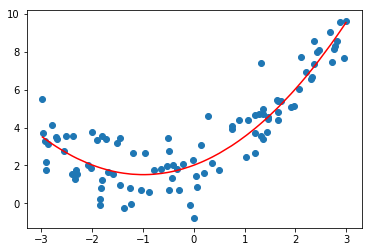

In [18]:
plt.scatter(x,y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [19]:
poly10_reg = polynomialRegression(degree=10)
poly10_reg.fit(X,y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376417

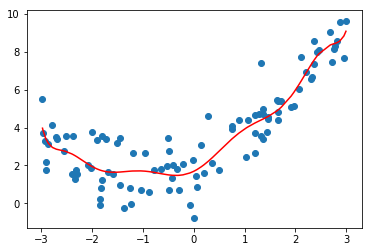

In [20]:
plt.scatter(x,y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

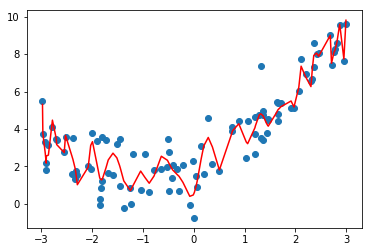

In [22]:
poly100_reg = polynomialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
plt.scatter(x,y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

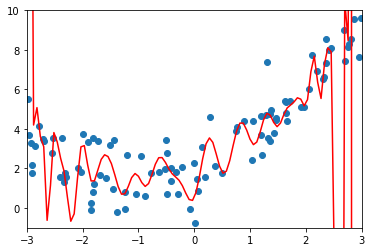

In [25]:
X_plot = np.linspace(-3, 3, 100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, -1, 10]) # x = [-3,3] , y = [-1, 10]
plt.show()

## 2. train test split 的意义

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [41]:
poly2_reg = polynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8035641056297901

In [42]:
poly10_reg = polynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150715

In [43]:
poly100_reg = polynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

13453914937.7781

## 3. 学习曲线

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

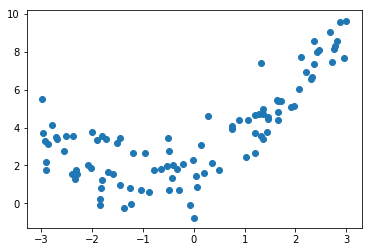

In [45]:
plt.scatter(x,y)
plt.show()

In [47]:
X_train.shape

(75, 1)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    y_test_predict = lin_reg.predict(X_test)
    train_score.append(mean_squared_error(y_train[:i], y_train_predict[:i]))
    test_score.append(mean_squared_error(y_test, y_test_predict))

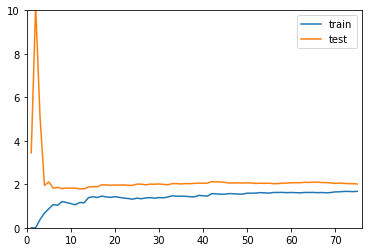

In [59]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.axis([0, 76, 0, 10])
plt.legend()
plt.show()

In [63]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.legend()
    plt.show()
    

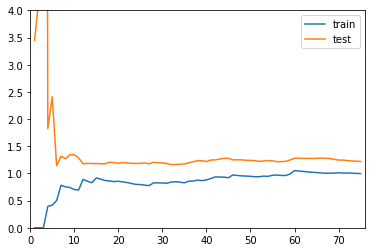

In [65]:
plot_learning_curve(polynomialRegression(2), X_train, X_test, y_train, y_test)

### 3.1 欠拟合 - 测试误差和训练误差都降不下来

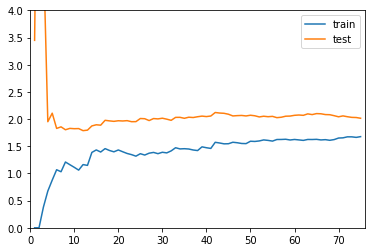

In [66]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

### 3. 2 过拟合 - 测试误差降不下来

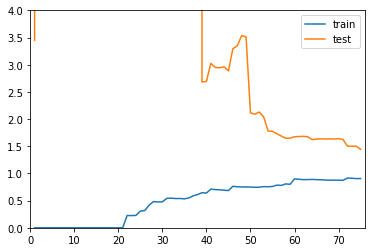

In [67]:
plot_learning_curve(polynomialRegression(20), X_train, X_test, y_train, y_test)

### 3.3 存在问题：针对特定测试数据集过拟合 ？   - 引入验证数据集(validation set)作为超参的选择和调整 

## 4. 交叉验证(Cross Validation)

### 4.1 使用测试train_test_split

In [77]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("Best k = ", best_k)
print("Best p = ", best_p)
print("Best Score = ", best_score)

Best k =  3
Best p =  4
Best Score =  0.9860917941585535


### 4.2 使用交叉验证

In [80]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98895028, 0.97777778, 0.96629213])

In [82]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("Best k = ", best_k)
print("Best p = ", best_p)
print("Best Score = ", best_score)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

Best k =  2
Best p =  2
Best Score =  0.9823599874006478


In [83]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

### 4.3 网格搜索中的CV，即Cross Validation

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i in range(1,6)]
    }
]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [85]:
grid_search.best_score_

0.9823747680890538

In [87]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [88]:
best_knn_clf = grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [89]:
best_knn_clf.score(X_test, y_test)

0.980528511821975

In [90]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99543379, 0.96803653, 0.98148148, 0.96261682, 0.97619048])

In [93]:
grid_cv5=GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1, cv=5)
grid_cv5.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### 4.4 k-folds交叉验证（把训练数据分成k份），缺点-每次训练k个模型，相当于整体性能慢了k倍

### 4.5 留一法LOO-CV（m个样本，把训练数据集分成m份，Leave-One-Out Cross Validation），缺点-计算量巨大

## 5.偏差方差权衡

### 5.1 解决过拟合问题（降低方差） 

- 降低模型复杂度
- 减少数据维度，降噪
- 增加样本数
- 使用验证集
- 正则化

### 5.2 岭回归

In [95]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

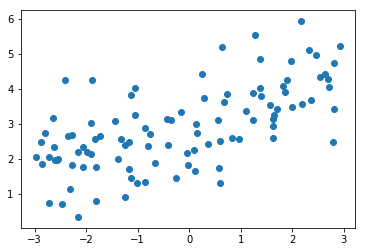

In [96]:
plt.scatter(x, y)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
from sklearn.metrics import mean_squared_error
poly_reg = polynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

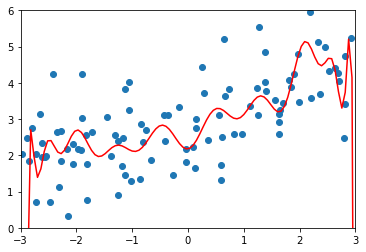

In [100]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3,3,0,6])
plt.show()

In [101]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

In [104]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
    ("poly", PolynomialFeatures(degree)),
    ("std", StandardScaler()),
    ("ridge", Ridge(alpha=alpha))
])

In [105]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y1_predict, y_test)

1.3233492754155471

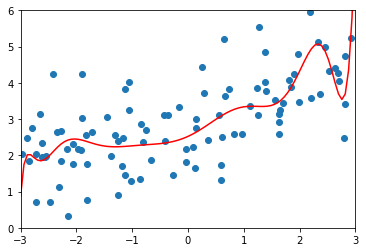

In [106]:
plot_model(ridge1_reg)

In [107]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y2_predict, y_test)

1.1888759304218448

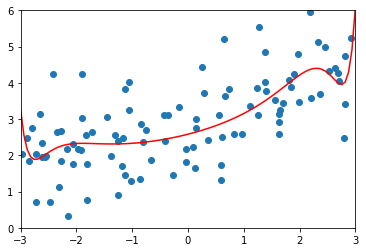

In [108]:
plot_model(ridge2_reg)

In [109]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y3_predict, y_test)

1.3196456113086197

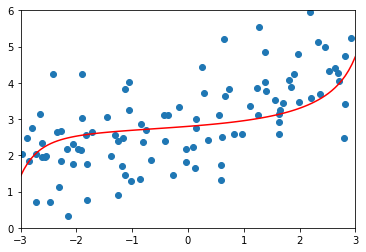

In [110]:
plot_model(ridge3_reg)

In [111]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y4_predict, y_test)

1.8408455590998372

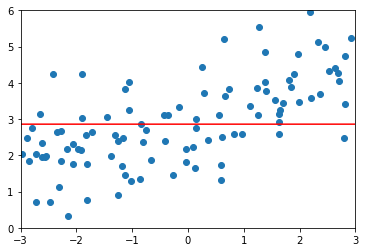

In [113]:
plot_model(ridge4_reg)

### 5.3 LASSO 回归 (Least Absolute Shrinkage and Selection Operator Regression)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

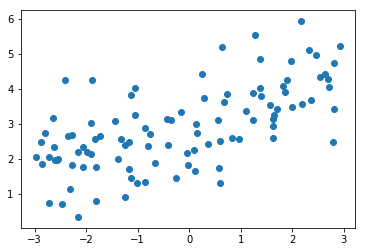

In [115]:
plt.scatter(x, y)
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
from sklearn.metrics import mean_squared_error
poly_reg = polynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

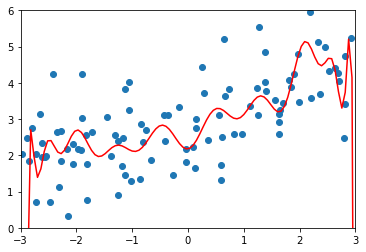

In [118]:
plot_model(poly_reg)

In [125]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [127]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_test_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_test_predict)

1.1496080843259968

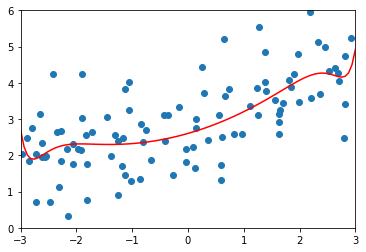

In [128]:
plot_model(lasso1_reg)

In [129]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_test_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_test_predict)

1.1213911351818648

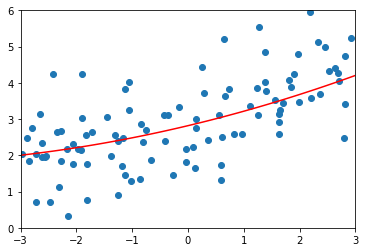

In [131]:
plot_model(lasso2_reg)

In [132]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_test_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_test_predict)

1.8408939659515595

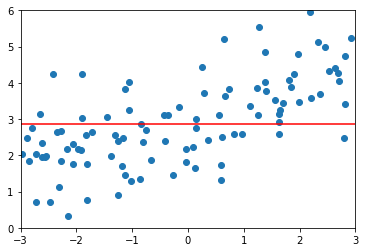

In [133]:
plot_model(lasso3_reg)

- LASSO趋向于使得一部分theta值变为0，所以可使用特征选择用

### 5.4 弹性网络

- 明可夫斯基距离 ||X||p  
- Lp范数
- 岭回归 L2
- Lasso L1
- 弹性网络 J = MSE + r * alpha * L1 + ((1-r)/2) * alpha * L2 